# Jabar Waspada Stunting EDA 

## Data: ASI, Stunting

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Importing Dataset

### Data ASI

In [2]:
#loading the downloaded csv
asi = pd.read_csv('/work/asi_lengkap/dinkes-od_17369_persentase_pemberian_air_susu_ibu_asi_eksklusif_pada_b_data.csv')
asi.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,45.52,PERSEN,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,73.82,PERSEN,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,46.94,PERSEN,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,27.58,PERSEN,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,22.09,PERSEN,2018


In [3]:
#checking the null/ nan data
asi.isnull().sum()

id                          0
kode_provinsi               0
nama_provinsi               0
kode_kabupaten_kota         0
nama_kabupaten_kota         0
persentase_pemberian_asi    0
satuan                      0
tahun                       0
dtype: int64

In [4]:
#consistent with isnull, count is all the same for all features
asi.describe()

,id,kode_provinsi,kode_kabupaten_kota,persentase_pemberian_asi,tahun
count,81.000000,81.0,81.000000,81.00000,81.000000
mean,41.000000,32.0,3231.333333,62.19321,2019.000000
std,23.526581,0.0,31.396258,23.85150,0.821584
min,1.000000,32.0,3201.000000,0.00000,2018.000000
25%,21.000000,32.0,3207.000000,49.39000,2018.000000
50%,41.000000,32.0,3214.000000,63.25000,2019.000000
75%,61.000000,32.0,3273.000000,73.82000,2020.000000
max,81.000000,32.0,3279.000000,172.32000,2020.000000


## Observation

- no null data/ nan data

- several columns like id, kode_provinsi, nama_provinsi , satuan can be dropped

- need to chop data above 100% e.g. Kabupaten Majalengka, etc.

- 'KABUPATEN' string can be removed from the nama_kabupaten_kota 

In [5]:
asi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        81 non-null     int64  
 1   kode_provinsi             81 non-null     int64  
 2   nama_provinsi             81 non-null     object 
 3   kode_kabupaten_kota       81 non-null     int64  
 4   nama_kabupaten_kota       81 non-null     object 
 5   persentase_pemberian_asi  81 non-null     float64
 6   satuan                    81 non-null     object 
 7   tahun                     81 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 5.2+ KB


## Data Cleaning and Quick EDA

In [6]:
#dropping redundant column
column_to_drop = ['id', 'kode_provinsi', 'nama_provinsi', 'satuan']
asi.drop(column_to_drop, axis=1, inplace=True)
asi

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun
0,3201,KABUPATEN BOGOR,45.52,2018
1,3202,KABUPATEN SUKABUMI,73.82,2018
2,3203,KABUPATEN CIANJUR,46.94,2018
3,3204,KABUPATEN BANDUNG,27.58,2018
4,3205,KABUPATEN GARUT,22.09,2018
...,...,...,...,...
76,3275,KOTA BEKASI,47.03,2020
77,3276,KOTA DEPOK,68.49,2020
78,3277,KOTA CIMAHI,76.47,2020
79,3278,KOTA TASIKMALAYA,68.31,2020


In [7]:
#dropping KABUPATEN
asi['nama_kabupaten_kota'] = asi['nama_kabupaten_kota'].str.replace('KABUPATEN ', '')
asi

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun
0,3201,BOGOR,45.52,2018
1,3202,SUKABUMI,73.82,2018
2,3203,CIANJUR,46.94,2018
3,3204,BANDUNG,27.58,2018
4,3205,GARUT,22.09,2018
...,...,...,...,...
76,3275,KOTA BEKASI,47.03,2020
77,3276,KOTA DEPOK,68.49,2020
78,3277,KOTA CIMAHI,76.47,2020
79,3278,KOTA TASIKMALAYA,68.31,2020


In [8]:
_deepnote_run_altair(asi, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"persentase_pemberian_asi","scale":{"type":"linear","zero":false}},"y":{"sort":{"order":"ascending","encoding":"x"},"type":"nominal","field":"nama_kabupaten_kota","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"tahun","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [9]:
#clipping persentase_pemberian_asi above 100%

asi['persentase_pemberian_asi'] = asi['persentase_pemberian_asi'].clip(0,100)
asi.describe()

,kode_kabupaten_kota,persentase_pemberian_asi,tahun
count,81.000000,81.000000,81.000000
mean,3231.333333,60.996543,2019.000000
std,31.396258,20.161630,0.821584
min,3201.000000,0.000000,2018.000000
25%,3207.000000,49.390000,2018.000000
50%,3214.000000,63.250000,2019.000000
75%,3273.000000,73.820000,2020.000000
max,3279.000000,100.000000,2020.000000


In [10]:
asi.nama_kabupaten_kota = asi.nama_kabupaten_kota.str.title()
asi

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun
0,3201,Bogor,45.52,2018
1,3202,Sukabumi,73.82,2018
2,3203,Cianjur,46.94,2018
3,3204,Bandung,27.58,2018
4,3205,Garut,22.09,2018
...,...,...,...,...
76,3275,Kota Bekasi,47.03,2020
77,3276,Kota Depok,68.49,2020
78,3277,Kota Cimahi,76.47,2020
79,3278,Kota Tasikmalaya,68.31,2020


In [ ]:
asi.nama_kabupaten_kota = asi.nama_kabupaten_kota.str.title(
                                                    ).replace({'Kota Banjar': 'Banjar'})


In [11]:
asi = asi.replace({'Kota Banjar': 'Banjar'})
asi


,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun
0,3201,Bogor,45.52,2018
1,3202,Sukabumi,73.82,2018
2,3203,Cianjur,46.94,2018
3,3204,Bandung,27.58,2018
4,3205,Garut,22.09,2018
...,...,...,...,...
76,3275,Kota Bekasi,47.03,2020
77,3276,Kota Depok,68.49,2020
78,3277,Kota Cimahi,76.47,2020
79,3278,Kota Tasikmalaya,68.31,2020


In [12]:
asi.groupby('nama_kabupaten_kota').mean()

,kode_kabupaten_kota,persentase_pemberian_asi,tahun
nama_kabupaten_kota,,,
Bandung,3204,51.556667,2019
Bandung Barat,3217,66.450000,2019
Banjar,3279,69.360000,2019
Bekasi,3216,50.700000,2019
Bogor,3201,49.900000,2019
Ciamis,3207,64.333333,2019
Cianjur,3203,62.250000,2019
Cirebon,3209,66.483333,2019
Garut,3205,55.036667,2019


In [13]:
#buat list urutan kota dari rendah-tinggi nilai rerata persentase pemberian asinya
urutan_kota_asi = asi.groupby('nama_kabupaten_kota')[
    'persentase_pemberian_asi'].mean(
    ).sort_values().keys().to_list()
urutan_kota_asi

['Kota Bekasi',
 'Kota Cimahi',
 'Karawang',
 'Indramayu',
 'Bogor',
 'Kuningan',
 'Bekasi',
 'Bandung',
 'Kota Bogor',
 'Purwakarta',
 'Subang',
 'Garut',
 'Kota Depok',
 'Kota Bandung',
 'Cianjur',
 'Kota Tasikmalaya',
 'Ciamis',
 'Bandung Barat',
 'Cirebon',
 'Sukabumi',
 'Banjar',
 'Kota Sukabumi',
 'Kota Cirebon',
 'Sumedang',
 'Tasikmalaya',
 'Majalengka',
 'Pangandaran']

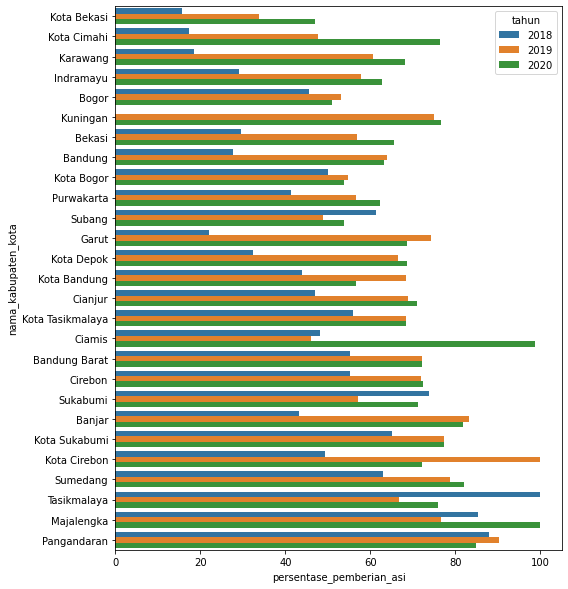

In [14]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
            data=asi, 
            x="persentase_pemberian_asi", 
            y="nama_kabupaten_kota", 
            hue="tahun",
            # palette="Blues",
            ax=ax,
            order=urutan_kota_asi,
            )

plt.show()

In [15]:
asi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   kode_kabupaten_kota       81 non-null     int64  
 1   nama_kabupaten_kota       81 non-null     object 
 2   persentase_pemberian_asi  81 non-null     float64
 3   tahun                     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


In [16]:
asi[asi['nama_kabupaten_kota'] == 'Bogor']

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun
0,3201,Bogor,45.52,2018
27,3201,Bogor,53.12,2019
54,3201,Bogor,51.06,2020


### Data Stunting

In [17]:
#importing and renaming the column to be consistent with ASI dataset
stunting_raw = pd.read_csv('/work/indeks_stunting/dpmdes-idm_jml_anak_stunting_mendapat_kunjungan__des_kel_data.csv',
            names=[
                'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota',
                'nama_kabupaten_kota', 'kode_kecamatan', 'nama_kecamatan',
                'kode_desa_kelurahan', 'nama_desa_kelurahan',
                'kemendagri_kode_kecamatan', 'kemendagri_nama_kecamatan',
                'kemendagri_kode_desa_kelurahan', 'kemendagri_nama_desa_kelurahan',
                'jumlah_anak_stunting', 'satuan', 'tahun', 'id'],
            header=0
            )
stunting_raw

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kode_kecamatan,nama_kecamatan,kode_desa_kelurahan,nama_desa_kelurahan,kemendagri_kode_kecamatan,kemendagri_nama_kecamatan,kemendagri_kode_desa_kelurahan,kemendagri_nama_desa_kelurahan,jumlah_anak_stunting,satuan,tahun,id
0,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,WANAHERANG,32.01.02,GUNUNG PUTRI,32.01.02.2001,WANAHERANG,24.0,ANAK,2019.0,1
1,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG KULUR,32.01.02,GUNUNG PUTRI,32.01.02.2002,BOJONG KULUR,5.0,ANAK,2019.0,2
2,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,CIANGSANA,32.01.02,GUNUNG PUTRI,32.01.02.2003,CIANGSANA,12.0,ANAK,2019.0,3
3,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,GUNUNG PUTRI,32.01.02,GUNUNG PUTRI,32.01.02.2004,GUNUNG PUTRI,0.0,ANAK,2019.0,4
4,32.0,JAWA BARAT,3201.0,KABUPATEN BOGOR,3201190.0,GUNUNG PUTRI,3.201190e+09,BOJONG NANGKA,32.01.02,GUNUNG PUTRI,32.01.02.2005,BOJONG NANGKA,0.0,ANAK,2019.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279020.0,PURWAHARJA,3.279020e+09,MEKARHARJA,32.79.03,PURWAHARJA,32.79.03.2003,MEKARHARJA,17.0,ANAK,2021.0,15932
15932,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,LANGENSARI,32.79.04,LANGENSARI,32.79.04.2001,LANGENSARI,0.0,ANAK,2021.0,15933
15933,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,REJASARI,32.79.04,LANGENSARI,32.79.04.2002,REJASARI,0.0,ANAK,2021.0,15934
15934,32.0,JAWA BARAT,3279.0,KOTA BANJAR,3279040.0,LANGENSARI,3.279040e+09,WARINGINSARI,32.79.04,LANGENSARI,32.79.04.2003,WARINGINSARI,0.0,ANAK,2021.0,15935


In [18]:
stunting_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15936 entries, 0 to 15935
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   kode_provinsi                   15936 non-null  float64
 1   nama_provinsi                   15936 non-null  object 
 2   kode_kabupaten_kota             15936 non-null  float64
 3   nama_kabupaten_kota             15936 non-null  object 
 4   kode_kecamatan                  15936 non-null  float64
 5   nama_kecamatan                  15936 non-null  object 
 6   kode_desa_kelurahan             15936 non-null  float64
 7   nama_desa_kelurahan             15936 non-null  object 
 8   kemendagri_kode_kecamatan       15936 non-null  object 
 9   kemendagri_nama_kecamatan       15936 non-null  object 
 10  kemendagri_kode_desa_kelurahan  15936 non-null  object 
 11  kemendagri_nama_desa_kelurahan  15936 non-null  object 
 12  jumlah_anak_stunting            

In [19]:
#include only relevant features
stunting = stunting_raw [['kode_kabupaten_kota','nama_kabupaten_kota', 'nama_desa_kelurahan','jumlah_anak_stunting', 'tahun']]
stunting

,kode_kabupaten_kota,nama_kabupaten_kota,nama_desa_kelurahan,jumlah_anak_stunting,tahun
0,3201.0,KABUPATEN BOGOR,WANAHERANG,24.0,2019.0
1,3201.0,KABUPATEN BOGOR,BOJONG KULUR,5.0,2019.0
2,3201.0,KABUPATEN BOGOR,CIANGSANA,12.0,2019.0
3,3201.0,KABUPATEN BOGOR,GUNUNG PUTRI,0.0,2019.0
4,3201.0,KABUPATEN BOGOR,BOJONG NANGKA,0.0,2019.0
...,...,...,...,...,...
15931,3279.0,KOTA BANJAR,MEKARHARJA,17.0,2021.0
15932,3279.0,KOTA BANJAR,LANGENSARI,0.0,2021.0
15933,3279.0,KOTA BANJAR,REJASARI,0.0,2021.0
15934,3279.0,KOTA BANJAR,WARINGINSARI,0.0,2021.0


In [20]:
#groupping by the Kabupaten
stunting = stunting.groupby(['nama_kabupaten_kota','kode_kabupaten_kota', 'tahun'])['jumlah_anak_stunting'].sum().reset_index()
stunting



,nama_kabupaten_kota,kode_kabupaten_kota,tahun,jumlah_anak_stunting
0,KABUPATEN BANDUNG,3204.0,2019.0,1579.0
1,KABUPATEN BANDUNG,3204.0,2020.0,2084.0
2,KABUPATEN BANDUNG,3204.0,2021.0,2080.0
3,KABUPATEN BANDUNG BARAT,3217.0,2019.0,337.0
4,KABUPATEN BANDUNG BARAT,3217.0,2020.0,388.0
5,KABUPATEN BANDUNG BARAT,3217.0,2021.0,444.0
6,KABUPATEN BEKASI,3216.0,2019.0,289.0
7,KABUPATEN BEKASI,3216.0,2020.0,1145.0
8,KABUPATEN BEKASI,3216.0,2021.0,1041.0
9,KABUPATEN BOGOR,3201.0,2019.0,1107.0


In [21]:
stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nama_kabupaten_kota   57 non-null     object 
 1   kode_kabupaten_kota   57 non-null     float64
 2   tahun                 57 non-null     float64
 3   jumlah_anak_stunting  57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB


In [22]:
#dropping KABUPATEN
stunting['nama_kabupaten_kota'] = stunting['nama_kabupaten_kota'].str.replace('KABUPATEN ', '').str.title()
stunting

,nama_kabupaten_kota,kode_kabupaten_kota,tahun,jumlah_anak_stunting
0,Bandung,3204.0,2019.0,1579.0
1,Bandung,3204.0,2020.0,2084.0
2,Bandung,3204.0,2021.0,2080.0
3,Bandung Barat,3217.0,2019.0,337.0
4,Bandung Barat,3217.0,2020.0,388.0
5,Bandung Barat,3217.0,2021.0,444.0
6,Bekasi,3216.0,2019.0,289.0
7,Bekasi,3216.0,2020.0,1145.0
8,Bekasi,3216.0,2021.0,1041.0
9,Bogor,3201.0,2019.0,1107.0


In [23]:
_deepnote_run_altair(stunting, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"jumlah_anak_stunting","scale":{"type":"linear","zero":false}},"y":{"sort":{"order":"ascending","encoding":"x"},"type":"nominal","field":"nama_kabupaten_kota","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"tahun","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [24]:
stunting[stunting['nama_kabupaten_kota'] == 'Bogor']

,nama_kabupaten_kota,kode_kabupaten_kota,tahun,jumlah_anak_stunting
9,Bogor,3201.0,2019.0,1107.0
10,Bogor,3201.0,2020.0,1086.0
11,Bogor,3201.0,2021.0,1226.0


In [25]:
stunting = stunting.replace({'Kota Banjar': 'Banjar'})
stunting


,nama_kabupaten_kota,kode_kabupaten_kota,tahun,jumlah_anak_stunting
0,Bandung,3204.0,2019.0,1579.0
1,Bandung,3204.0,2020.0,2084.0
2,Bandung,3204.0,2021.0,2080.0
3,Bandung Barat,3217.0,2019.0,337.0
4,Bandung Barat,3217.0,2020.0,388.0
5,Bandung Barat,3217.0,2021.0,444.0
6,Bekasi,3216.0,2019.0,289.0
7,Bekasi,3216.0,2020.0,1145.0
8,Bekasi,3216.0,2021.0,1041.0
9,Bogor,3201.0,2019.0,1107.0


In [26]:
#buat list urutan kota dari rendah-tinggi jumlah anak stunting total
urutan_kota_stunting = stunting.groupby('nama_kabupaten_kota')['jumlah_anak_stunting'].sum().sort_values(ascending=False).keys().to_list()
urutan_kota_stunting

['Sukabumi',
 'Bandung',
 'Tasikmalaya',
 'Cirebon',
 'Garut',
 'Bogor',
 'Subang',
 'Sumedang',
 'Purwakarta',
 'Ciamis',
 'Bekasi',
 'Cianjur',
 'Majalengka',
 'Kuningan',
 'Karawang',
 'Bandung Barat',
 'Indramayu',
 'Pangandaran',
 'Banjar']

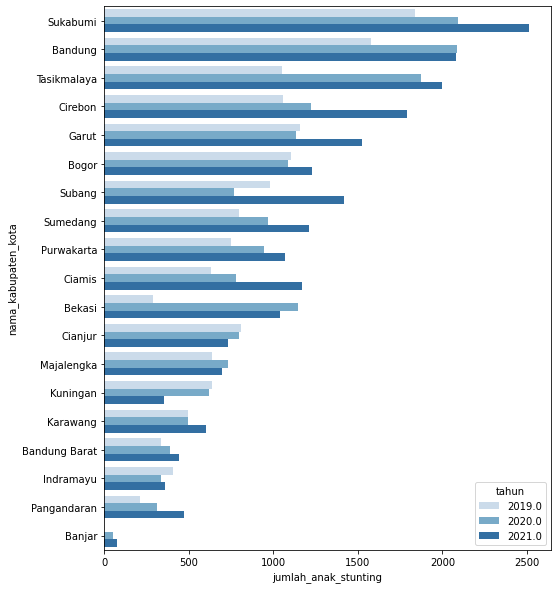

In [27]:
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(
            data=stunting, 
            x="jumlah_anak_stunting", 
            y="nama_kabupaten_kota", 
            hue="tahun", 
            palette="Blues",
            ax=ax,
            order = urutan_kota_stunting
            )

plt.show()

In [49]:
asi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   kode_kabupaten_kota       81 non-null     int64  
 1   nama_kabupaten_kota       81 non-null     object 
 2   persentase_pemberian_asi  81 non-null     float64
 3   tahun                     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun
0,3201,Bogor,45.52,2018
1,3202,Sukabumi,73.82,2018
2,3203,Cianjur,46.94,2018
3,3204,Bandung,27.58,2018
4,3205,Garut,22.09,2018
...,...,...,...,...
76,3275,Kota Bekasi,47.03,2020
77,3276,Kota Depok,68.49,2020
78,3277,Kota Cimahi,76.47,2020
79,3278,Kota Tasikmalaya,68.31,2020


In [48]:
stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nama_kabupaten_kota   57 non-null     object 
 1   kode_kabupaten_kota   57 non-null     float64
 2   tahun                 57 non-null     float64
 3   jumlah_anak_stunting  57 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.9+ KB


In [50]:
stunting = stunting.astype(
    {
        'kode_kabupaten_kota':int,
        'tahun': int,
        'jumlah_anak_stunting':int
    }
)

In [51]:
stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nama_kabupaten_kota   57 non-null     object
 1   kode_kabupaten_kota   57 non-null     int64 
 2   tahun                 57 non-null     int64 
 3   jumlah_anak_stunting  57 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ KB


In [52]:
stunting

,nama_kabupaten_kota,kode_kabupaten_kota,tahun,jumlah_anak_stunting
0,Bandung,3204,2019,1579
1,Bandung,3204,2020,2084
2,Bandung,3204,2021,2080
3,Bandung Barat,3217,2019,337
4,Bandung Barat,3217,2020,388
5,Bandung Barat,3217,2021,444
6,Bekasi,3216,2019,289
7,Bekasi,3216,2020,1145
8,Bekasi,3216,2021,1041
9,Bogor,3201,2019,1107


### Comparison 

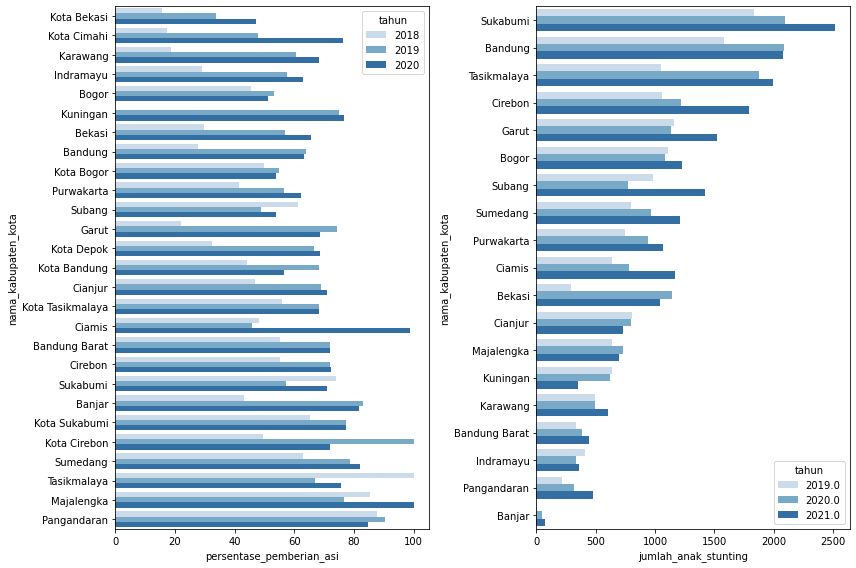

In [29]:
# setting up the canvas and fig size
fig, ax = plt.subplots(1,2, figsize=(12, 8))

#ASI
sns.barplot(
            data=asi, 
            x="persentase_pemberian_asi", 
            y="nama_kabupaten_kota", 
            hue="tahun",
            palette="Blues",
            ax=ax[0],
            order=urutan_kota_asi,
            )

#stunting
sns.barplot(
            data=stunting, 
            x="jumlah_anak_stunting", 
            y="nama_kabupaten_kota", 
            hue="tahun", 
            palette="Blues",
            ax=ax[1],
            order = urutan_kota_stunting,
            )

plt.tight_layout()

plt.show()

- Based on two datasets above, Kabupaten Sukabumi with more than 60% ASI percentage can have the highest number of stunting children.

- On the other hand, Kabupaten like Ciamis and Majalengka which the ASI are among the highest, have a low number of stunting children.

- This may indicate that ASI is not the only sole factor determining the stunting index of a children. Further analysis may be needed. 

### Combining ASI and Stunting Index dataset

In [30]:
stunting.columns

Index(['nama_kabupaten_kota', 'kode_kabupaten_kota', 'tahun',
       'jumlah_anak_stunting'],
      dtype='object')

In [31]:
asi.columns


Index(['kode_kabupaten_kota', 'nama_kabupaten_kota',
       'persentase_pemberian_asi', 'tahun'],
      dtype='object')

In [32]:
asi

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun
0,3201,Bogor,45.52,2018
1,3202,Sukabumi,73.82,2018
2,3203,Cianjur,46.94,2018
3,3204,Bandung,27.58,2018
4,3205,Garut,22.09,2018
...,...,...,...,...
76,3275,Kota Bekasi,47.03,2020
77,3276,Kota Depok,68.49,2020
78,3277,Kota Cimahi,76.47,2020
79,3278,Kota Tasikmalaya,68.31,2020


In [33]:
#merging asi and stunting data via kabupaten
asi_stunting = asi.merge(stunting[[
                    'kode_kabupaten_kota', 'jumlah_anak_stunting']], on = ['kode_kabupaten_kota'], how = 'inner')

asi_stunting

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_pemberian_asi,tahun,jumlah_anak_stunting
0,3201,Bogor,45.52,2018,1107.0
1,3201,Bogor,45.52,2018,1086.0
2,3201,Bogor,45.52,2018,1226.0
3,3201,Bogor,53.12,2019,1107.0
4,3201,Bogor,53.12,2019,1086.0
...,...,...,...,...,...
166,3279,Banjar,83.18,2019,50.0
167,3279,Banjar,83.18,2019,73.0
168,3279,Banjar,81.72,2020,1.0
169,3279,Banjar,81.72,2020,50.0


In [34]:
_deepnote_run_altair(asi_stunting, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"persentase_pemberian_asi","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"jumlah_anak_stunting","scale":{"type":"linear","zero":false},"aggregate":"average"},"color":{"sort":null,"type":"nominal","field":"nama_kabupaten_kota","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

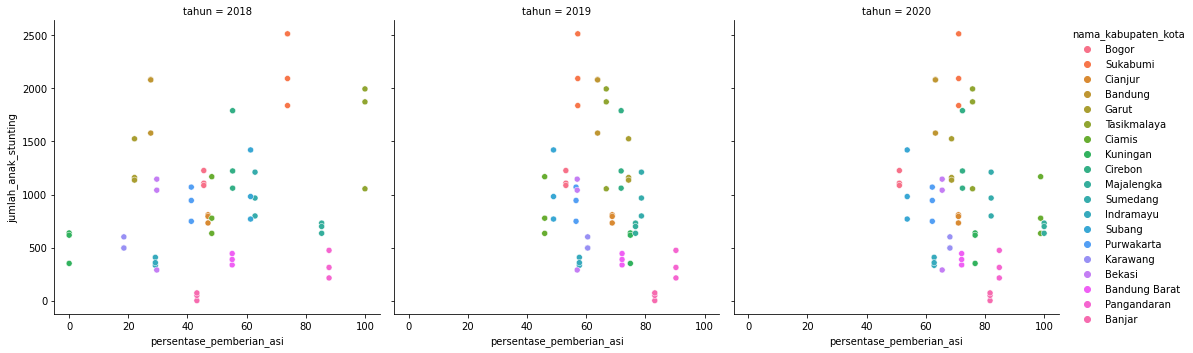

In [35]:
#checking if any relationship between number of stunting vs ASI percentage

sns.relplot(data=asi_stunting, 
            x='persentase_pemberian_asi', 
            y='jumlah_anak_stunting', 
            col = 'tahun',
            hue = 'nama_kabupaten_kota', 
            )

plt.show()

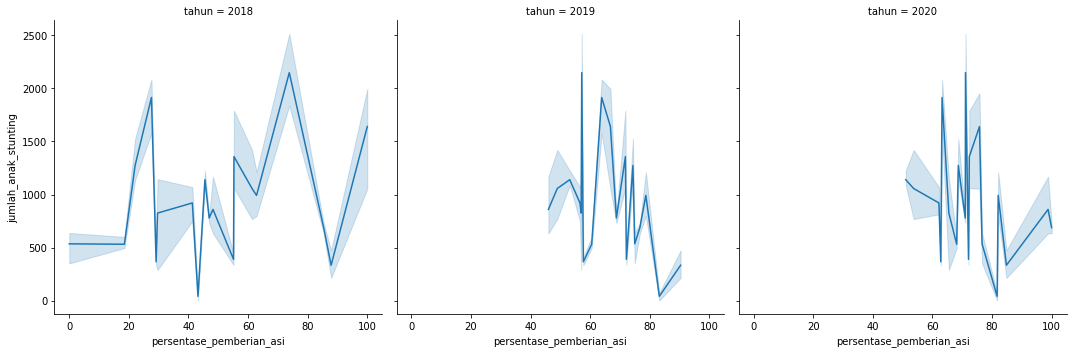

In [36]:
#checking if any relationship between number of stunting vs ASI percentage
sns.relplot(
            data=asi_stunting, 
            x='persentase_pemberian_asi', 
            y='jumlah_anak_stunting', 
            col = 'tahun', 
            # style='nama_kabupaten_kota', 
            kind='line'
            
            );

- There is no clear difference between average of jumlah_anak_stunting with the low persentase_pemberian_asi. Even at more than 50%, the number of stunting children still very high. 

- Simiilar with previous observation, we may need to see its correlation to other features i.e. Imunisasi, Air Bersih, Penyuluhan Ibu etc. 

# Creating Polygon Data from SHP

In [37]:
!pip install geopandas
import geopandas as gpd 

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [38]:
indo_map = gpd.read_file('/work/gadm36_IDN_shp/gadm36_IDN_2.shp')
indo_map

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.2_1,Aceh Barat,None,None,Kabupaten,Regency,1107,ID.AC.AB,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ..."
1,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.1_1,Aceh Barat Daya,None,None,Kabupaten,Regency,1112,ID.AC.AD,"MULTIPOLYGON (((96.80518 3.72169, 96.80582 3.7..."
2,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.3_1,Aceh Besar,None,None,Kabupaten,Regency,1108,ID.AC.AR,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.4_1,Aceh Jaya,None,None,Kabupaten,Regency,1116,ID.AC.AJ,"MULTIPOLYGON (((95.87688 4.36750, 95.87684 4.3..."
4,IDN,Indonesia,IDN.1_1,Aceh,None,IDN.1.5_1,Aceh Selatan,None,None,Kabupaten,Regency,1103,ID.AC.AS,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.1_1,Bantul,None,None,Kabupaten,Regency,3402,ID.YO.BA,"POLYGON ((110.32923 -8.00613, 110.32927 -8.006..."
498,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.2_1,Gunung Kidul,None,None,Kabupaten,Regency,3403,ID.YO.GK,"MULTIPOLYGON (((110.66244 -8.17778, 110.66234 ..."
499,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.3_1,Kota Yogyakarta,None,None,Kota,City,3471,ID.YO.YO,"POLYGON ((110.40143 -7.81923, 110.40170 -7.819..."
500,IDN,Indonesia,IDN.33_1,Yogyakarta,None,IDN.33.4_1,Kulon Progo,None,None,Kabupaten,Regency,3401,ID.YO.KP,"POLYGON ((110.20530 -7.98388, 110.20493 -7.984..."


In [39]:
indo_map.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')

In [40]:
jabar_map = indo_map[['NAME_1', 'NAME_2','TYPE_2','CC_2','geometry']]
jabar_map

,NAME_1,NAME_2,TYPE_2,CC_2,geometry
0,Aceh,Aceh Barat,Kabupaten,1107,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ..."
1,Aceh,Aceh Barat Daya,Kabupaten,1112,"MULTIPOLYGON (((96.80518 3.72169, 96.80582 3.7..."
2,Aceh,Aceh Besar,Kabupaten,1108,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,Aceh,Aceh Jaya,Kabupaten,1116,"MULTIPOLYGON (((95.87688 4.36750, 95.87684 4.3..."
4,Aceh,Aceh Selatan,Kabupaten,1103,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."
...,...,...,...,...,...
497,Yogyakarta,Bantul,Kabupaten,3402,"POLYGON ((110.32923 -8.00613, 110.32927 -8.006..."
498,Yogyakarta,Gunung Kidul,Kabupaten,3403,"MULTIPOLYGON (((110.66244 -8.17778, 110.66234 ..."
499,Yogyakarta,Kota Yogyakarta,Kota,3471,"POLYGON ((110.40143 -7.81923, 110.40170 -7.819..."
500,Yogyakarta,Kulon Progo,Kabupaten,3401,"POLYGON ((110.20530 -7.98388, 110.20493 -7.984..."


In [41]:
new_name = {
    'NAME_1': 'propinsi',
    'NAME_2': 'nama_kabupaten',
    'TYPE_2': 'tipe_admin',
    'CC_2': 'kode_kabupaten' ,
    'geometry': 'geometri',
}

jabar_map = jabar_map.rename(columns=new_name)


In [42]:
jabar_map

,propinsi,nama_kabupaten,tipe_admin,kode_kabupaten,geometri
0,Aceh,Aceh Barat,Kabupaten,1107,"POLYGON ((96.13205 4.13408, 96.13216 4.13404, ..."
1,Aceh,Aceh Barat Daya,Kabupaten,1112,"MULTIPOLYGON (((96.80518 3.72169, 96.80582 3.7..."
2,Aceh,Aceh Besar,Kabupaten,1108,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,Aceh,Aceh Jaya,Kabupaten,1116,"MULTIPOLYGON (((95.87688 4.36750, 95.87684 4.3..."
4,Aceh,Aceh Selatan,Kabupaten,1103,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."
...,...,...,...,...,...
497,Yogyakarta,Bantul,Kabupaten,3402,"POLYGON ((110.32923 -8.00613, 110.32927 -8.006..."
498,Yogyakarta,Gunung Kidul,Kabupaten,3403,"MULTIPOLYGON (((110.66244 -8.17778, 110.66234 ..."
499,Yogyakarta,Kota Yogyakarta,Kota,3471,"POLYGON ((110.40143 -7.81923, 110.40170 -7.819..."
500,Yogyakarta,Kulon Progo,Kabupaten,3401,"POLYGON ((110.20530 -7.98388, 110.20493 -7.984..."


In [43]:
jabar_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   propinsi        502 non-null    object  
 1   nama_kabupaten  502 non-null    object  
 2   tipe_admin      502 non-null    object  
 3   kode_kabupaten  501 non-null    object  
 4   geometri        502 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 19.7+ KB


In [44]:
jabar_map_final = jabar_map[jabar_map['propinsi'] == 'Jawa Barat'].reset_index()
jabar_map_final

,index,propinsi,nama_kabupaten,tipe_admin,kode_kabupaten,geometri
0,81,Jawa Barat,Bandung,Kabupaten,3204,"POLYGON ((107.91476 -7.03680, 107.91488 -7.036..."
1,82,Jawa Barat,Bandung Barat,Kabupaten,3217,"POLYGON ((107.18784 -7.06032, 107.18757 -7.060..."
2,83,Jawa Barat,Banjar,Kota,3279,"POLYGON ((108.63680 -7.38144, 108.63651 -7.381..."
3,84,Jawa Barat,Bekasi,Kabupaten,3216,"POLYGON ((107.08303 -6.44980, 107.08250 -6.449..."
4,85,Jawa Barat,Bogor,Kabupaten,3201,"POLYGON ((107.19311 -6.57829, 107.19368 -6.578..."
5,86,Jawa Barat,Ciamis,Kabupaten,3207,"POLYGON ((108.77411 -7.68451, 108.77433 -7.684..."
6,87,Jawa Barat,Cianjur,Kabupaten,3203,"POLYGON ((106.98129 -7.44455, 106.97968 -7.444..."
7,88,Jawa Barat,Cimahi,Kota,3277,"POLYGON ((107.56550 -6.87602, 107.56554 -6.875..."
8,89,Jawa Barat,Cirebon,Kabupaten,3209,"MULTIPOLYGON (((108.46553 -6.79754, 108.46519 ..."
9,90,Jawa Barat,Depok,Kota,3276,"POLYGON ((106.83224 -6.45344, 106.83221 -6.453..."


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=339b6456-5189-4150-aad1-133851431c71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>